# 광고플랫폼에 따른 판매 예측(회귀) 💸

## 라이브러리 호출

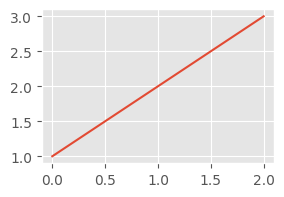

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pandas : 데이터 분석과 조작을 위한 라이브러리, 표 형식의 데이터를 처리하는데 최적화 되어 있습니다.
# numpy : 수치 계산을 위한 라이브러리로, 다차원 배열과 행렬 연산을 지원함
# numpy는 수치계산을 처리하고, pandas는 결과를 dataframe에 저장하여 분석 및 시각화 진행

plt.style.use('ggplot') # matplotlib 스타일 설정

# ggplot 스타일의 특징 >> 데이터 분석 시 자주 사용 

# 부드러운 색상과 그라데이션.
# 격자선과 배경이 강조되어 깔끔하고 직관적인 그래프.
# 데이터 시각화에 적합한 기본 색상 팔레트.

pd.Series([1,2,3]).plot(figsize=(3,2)) # series는 1차원 배열과 같은 구조 # python의 list나 numpy의 array가 인자로 입력됨
plt.show()
# plot은 Pandas의 시각화 메서드로, Matplotlib 기반으로 데이터를 시각화
# 기본적으로 Series.plot()은 x축에 인덱스(index)를, y축에 값을 나타냄

In [5]:
pip install scikit-learn # 머신러닝을 위한 설치

Note: you may need to restart the kernel to use updated packages.


In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/main/advertising.csv')


In [9]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## 데이터 이해

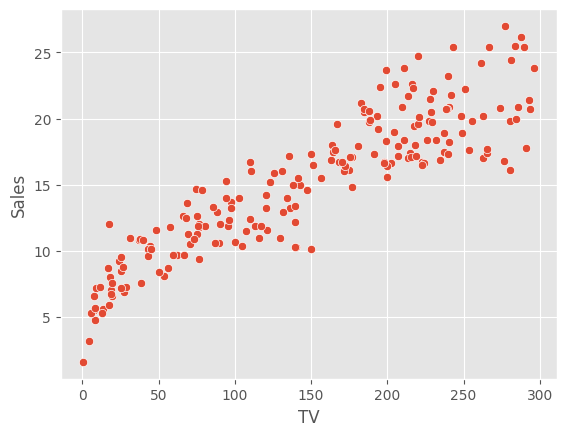

In [15]:
# 시각화

# 광고비에 따른 판매량(TV)
sns.scatterplot(data=df,x='TV',y='Sales')
plt.show()

<Axes: xlabel='TV', ylabel='Sales'>

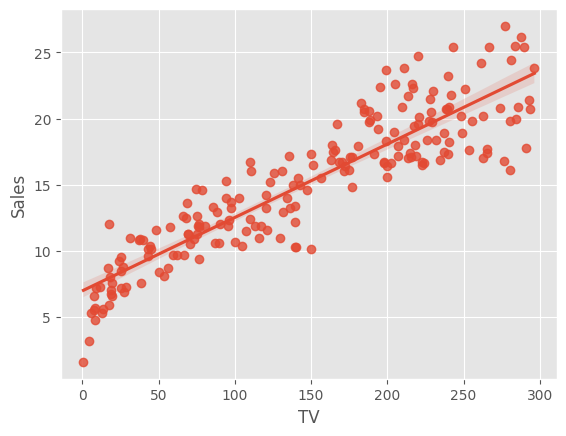

In [17]:
# 단순선형회귀(TV)
sns.regplot(data = df,x='TV',y='Sales')

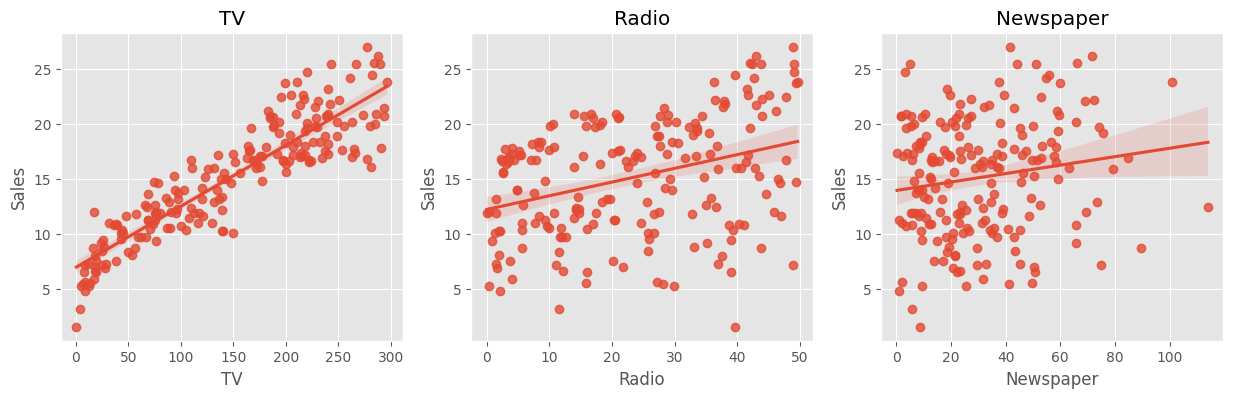

In [21]:
# 시각화
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.regplot(data=df,x='TV',y='Sales')
plt.title('TV')

plt.subplot(1,3,2)
sns.regplot(data = df, x='Radio',y='Sales')
plt.title('Radio')

plt.subplot(1,3,3)
sns.regplot(data=df,x='Newspaper',y='Sales')
plt.title('Newspaper')

plt.show()

## 상관계수

In [22]:
# 피어슨 상관계수
# 두 변수 간의 선형 관계의 강도를 나타내며, -1~1사이의 값을 가짐(강도는 절대값으로 따진다!)
# 변수가 수치형 데이터이면서 선형관계라면 사용하면 좋음
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

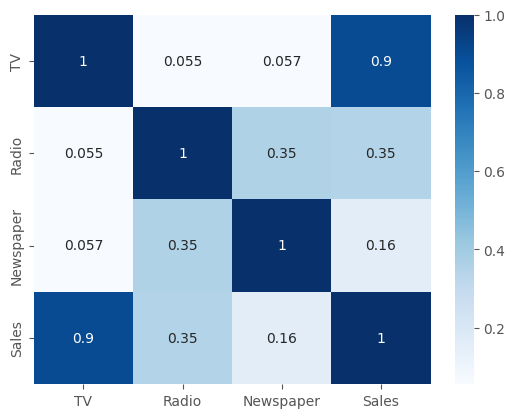

In [24]:
# 상관계수 히트맵 시각화

sns.heatmap(df.corr(),cmap ='Blues',annot=True )

## 단순선형회귀

In [33]:
X = df[['TV']]
y = df['Sales']

In [34]:
# 훈련세트, 테스트 분할

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state= 42) 

X_train.shape,X_test.shape,y_train.shape,y_test.shape # (학습데이터, feature)

((150, 1), (50, 1), (150,), (50,))

In [35]:
X_train

,TV
114,78.2
173,168.4
5,8.7
126,7.8
117,76.4
...,...
106,25.0
14,204.1
92,217.7
179,165.6


In [37]:
y_train

114    14.6
173    16.7
5       7.2
126     6.6
117     9.4
       ... 
106     7.2
14     19.0
92     19.4
179    17.6
102    19.8
Name: Sales, Length: 150, dtype: float64

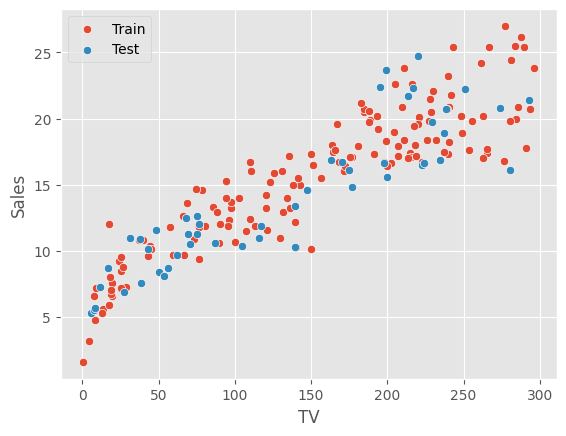

In [44]:
# 훈련세트, 테스트세트 분할 확인(시각화)

sns.scatterplot(x=X_train['TV'],y=y_train,label = 'Train')
sns.scatterplot(x=X_test['TV'],y=y_test,label = 'Test');

## 모델 생성 및 훈련

In [47]:
from sklearn.linear_model import LinearRegression # 선형회귀 호출

model = LinearRegression() # 빈 모델 생성 

model.fit(X_train,y_train) # 훈련 데이터 학습 

LinearRegression()

## 모델 평가

In [62]:
# 모델 평가를 위한 함수 import
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,mean_squared_error,r2_score

# 예측값 산출
pred = model.predict(X_test)

#예측값과 실제값의 차이(Loss/Error)를 이용한 모델 평가
mse = mean_squared_error(y_test,pred)
mae = mean_absolute_error(y_test,pred)
rmse = root_mean_squared_error(y_test,pred)
r2 = r2_score(y_test,pred)

print(f'mse\t: {mean_squared_error(y_test,pred):.2f}') # 타깃과 예측의 차이를 제곱한 것들의 합의 평균
print(f'mae\t: {mean_absolute_error(y_test,pred):.2f}') # 실제값과 예측값의 차이의 절대값의 합의 평균
print(f'rmse\t: {root_mean_squared_error(y_test,pred):.2f}') # 평균제곱오차(MSE)의 양의 제곱근
print(f'r2\t: {r2_score(y_test,pred):.2f}')# 1에 가까울 수록 높은 성능의 모델


mse	: 5.51
msa	: 1.87
rmse	: 2.35
r2	: 0.80


In [67]:
# 평가지표를 dataframe으로 생성

df_pred = pd.DataFrame({'X_test':X_test['TV'],'y_test':y_test,'y_pred':pred})
df_pred['error'] = df_pred['y_test']-df_pred['y_pred']
df_pred.head(10)

,X_test,y_test,y_pred,error
95,163.3,16.9,16.143474,0.756526
15,195.4,22.4,17.921382,4.478618
30,292.9,21.4,23.321569,-1.921569
158,11.7,7.3,7.746876,-0.446876
128,220.3,24.7,19.300506,5.399494
115,75.1,12.6,11.258382,1.341618
69,216.8,22.3,19.106654,3.193346
170,50.0,8.4,9.868180,-1.468180
174,222.4,16.5,19.416818,-2.916818
45,175.1,16.1,16.797035,-0.697035


In [71]:
# 회귀 모델의 평가 점수 수동 계산

mae = abs(df_pred['error']).mean() # 절대값의 평균
mse = np.square(df_pred['error']).mean() #제곱의 평균
rmse= np.sqrt(mse)

rss = np.square(df_pred['error']).sum()
tss = np.square(df_pred['y_test']-df_pred['y_test'].mean()).sum()
r2 = 1-(rss/tss)

print(f'MSE : {mse:.2f}')
print(f'RMSE : {rmse:.2f}')
print(f'MAE : {mae:.2f}')
print(f'R2 : {r2:.2f}')

MSE : 5.51
RMSE : 2.35
MAE : 1.87
R2 : 0.80


In [81]:
# 회귀계수와 y절편

# 회귀계수(w)
print(f'회귀계수:{model.coef_}')
w = model.coef_

# 절편(b)
print(f'y절편: {model.intercept_}')
b = model.intercept_

# 회귀식
print(f'회귀식: {w[0]}*TV+{b}')

회귀계수:[0.05538653]
y절편: 7.098853680118275
회귀식: 0.05538653085519158*TV+7.098853680118275


Text(0.5, 1.0, 'TV_Sales Test')

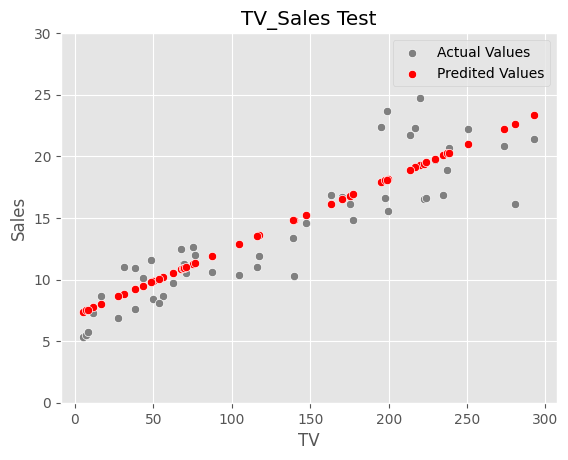

In [84]:
# 회귀계수 예측값과 결과값 확인

sns.scatterplot(x=X_test['TV'],y=y_test,color='gray',label='Actual Values')
sns.scatterplot(x=X_test['TV'],y=pred,color='red',label='Predited Values')
plt.ylim(0,30)
plt.title('TV_Sales Test')


In [88]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    16.5
45     16.1
66     11.0
182     8.7
165    16.9
78      5.3
186    10.3
177    16.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65     11.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      15.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
195     7.6
29     10.5
19     14.6
143    10.4
86     12.0
Name: Sales, dtype: float64

In [92]:
type(pred)
type(y_test)

pandas.core.series.Series

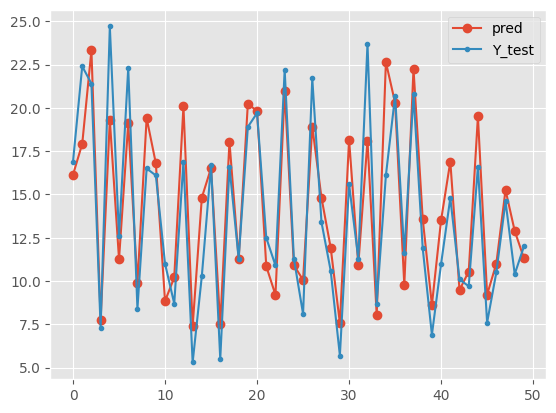

Signature:
plt.plot(
    *args: 'float | ArrayLike | str',
    scalex: 'bool' = True,
    scaley: 'bool' = True,
    data=None,
    **kwargs,
) -> 'list[Line2D]'
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yie

In [93]:
plt.plot(pred,marker ='o',label='pred')
plt.plot(np.array(y_test),marker='.',label = 'Y_test') 

# p.array(y_test)로 변환하는 이유는 y_test가 단순 리스트나 다른 형태의 데이터 구조일 가능성이 있기 때문입니다. 
# 이를 NumPy 배열로 변환하면 일관성을 확보할 수 있고, matplotlib의 plot 함수와 같은 연산에 적합한 형태로 데이터를 다룰 수 있습니다.

plt.legend()
pass

plt.plot?

In [94]:
# TV광고비(예산)에 따른 판매량 예측하기
tv = 100

print(f'TV광고비 : {tv}')

# 예측값
print(model.predict([[tv]]))

# 예측값_수동
print(model.coef_*tv + model.intercept_)
predict_sales = model.predict([[tv]])*1000
print(f'TV광고비 {tv}천달러에 따른 판매량은 {predict_sales[0]:.2f}달러입니다.')


TV광고비 : 100
[12.63750677]
[12.63750677]
TV광고비 100천달러에 따른 판매량은 12637.51달러입니다.


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 다중회귀모델

In [96]:
# 변수 설정

X2 = df[['TV','Radio','Newspaper']]
y = df['Sales']

<Axes: >

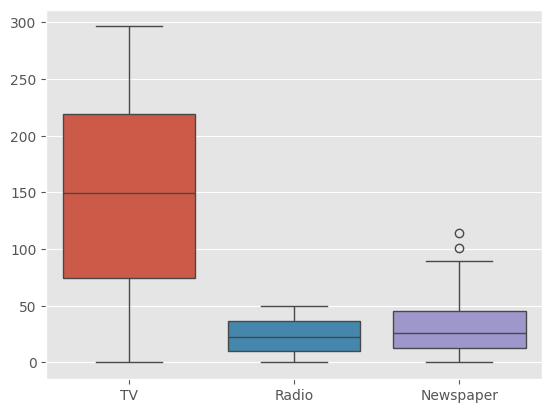

In [97]:
# 독립변수의 데이터 분포 파악
sns.boxplot(X2)

## 독립변수 스케일링하기

### StandardScaler(평균:0,표준편차:1로 정규분포로 나타냄), MinMaxScaler(최대최소가 1,0이 되도록 스케일링), RobustScaler(로버스트,데이터의 중앙값 = 0,IQR(사분위수=1이 되도록 스케일링))

In [106]:
from sklearn.preprocessing import StandardScaler 

# 속성값의 차이가 있으므로 속성값의 범위를 일정하게 맞춰주는 방법으로 표준화 적용
# 표준화를 이용하여 평균이 0이고 표준편차가 1인 정규분포로 만들기

scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)
print(X2_scaled.shape) # 200개의 데이터, 3개의 변수

print(f'스케일된 변수별 평균: {X2_scaled[:,0].mean()},{X2_scaled[:,1].mean()},{X2_scaled[:,2].mean()}')
print(f'스케일된 변수별 표준편차:{X2_scaled[:,0].std()},{X2_scaled[:,1].std()},{X2_scaled[:,2].std()}')

(200, 3)
스케일된 변수별 평균: 1.2212453270876723e-16,-4.529709940470639e-16,2.220446049250313e-16
스케일된 변수별 표준편차:1.0,1.0,0.9999999999999999


In [107]:
# 데이터 분할
X_train,X_test,y_train,y_test = train_test_split(X2_scaled,y,random_state= 42) 

X_train.shape,X_test.shape,y_train.shape,y_test.shape # (학습데이터, feature)


((150, 3), (50, 3), (150,), (50,))

In [111]:
# 모델 생성 및 학습

model2=LinearRegression()

model2.fit(X_train,y_train)

LinearRegression()

In [114]:
#모델 평가

pred2=model2.predict(X_test)

mae2 = mean_absolute_error(y_test,pred2)
rmse2 = root_mean_squared_error(y_test,pred2)
mse2 = mean_squared_error(y_test,pred2)
r2_2 = r2_score(y_test,pred2)

print(f'MSE(평균제곱오차) : {mse2:.2f}') #타깃과 예측의 차이를 제곱한 것들의 합의 평균
print(f'RMSE(평균제곱근오차) : {rmse2:.2f}') #평균제곱오차(MSE)의 양의 제곱근
print(f'MAE(평균절대값오차) : {mae2:.2f}') #실제값과 예측값의 차이의 절대값의 합의 평균
print(f'R2(결정계수) : {r2_2:.2f}') #1에 가까울 수록 높은 성능의 모델

MSE(평균제곱오차) : 2.40
RMSE(평균제곱근오차) : 1.55
MAE(평균절대값오차) : 1.12
R2(결정계수) : 0.91


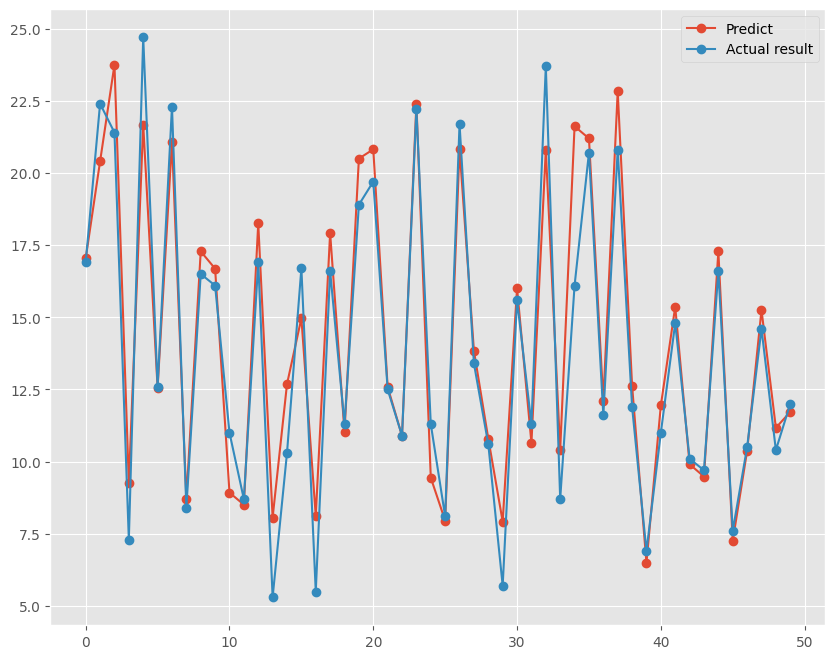

In [120]:
# 예측값 실측값 비교(시각화)
plt.figure(figsize=(10,8))
plt.plot(pred2,marker='o',label = 'Predict')
plt.plot(np.array(y_test),marker='o',label = 'Actual result')
plt.legend()
plt.show()

In [124]:
# 회귀식 나타내기

print(f'회귀계수\t: {model2.coef_}')
w = model2.coef_
print(f'y절편\t: {model2.intercept_}')
b = model2.intercept_
print(f'회귀식\t: {w[0]}*TV + {w[1]}*Radio + {w[2]}*Newspaper + {b}') # 회귀식이며, 독립변수가 3개인 다중 회귀


회귀계수	: [4.67709227 1.4774023  0.09352121]
y절편	: 15.22473459736965
회귀식	: 4.677092268978724*TV + 1.4774023036363388*Radio + 0.0935212124232997*Newspaper + 15.22473459736965
